<h1> Agente Gestor de Inventario 🤖✅</h1>

---


<h3>Algoritmo de búsqueda</h3>

<p>Para empezar a realizar el algoritmo de búsqueda de nuestro agente deberemos tener en cuenta que tipo de datos disponemos en el inventario, y con base en esto podemos determinar que parametros considerar dentro de nuestro objetivo (Maximizar ganancias).</p>


---



<h3> Librerias necesarias para la ejecución </h3>

<p>Por el momento estamos usando:</p>

<ul>
 <li>Numpy</li>
 <li>Pandas</li>
</ul>

<p>Para realizar ciertas operaciones dentro del data frame donde se encuentran contenidos los datos.</p>

In [ ]:
!pip install numpy
!pip install pandas
!pip install mesa
!pip install pyswip
!apt install swi-prolog
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 11.6 MB/s 
     |████████████████████████████████| 66 kB 1.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file gettext gettext-base intltool-debian
  javascript-common libarchive-cpio-perl libarchive-zip-perl libbsd-de



---


<p> Planteremos un código de búsueda basado en heuristica, en este caso el componente de la heuristica que nos indicara que valor es el buscado, lo definiremos con la formula de: </p>
$$
valoresBuscados = \frac{precioVenta - costo}{diasEnInventario}
$$


In [ ]:
from mesa import Agent,Model
from tokenize import Number
import numpy as np
import pandas as pd
from google.colab import files

class Agent_IOA(Agent):
    # First Deliverable
    def __init__(self):
        print("Hello human, I'm your IOA")
    
    # Second Deliverable
    def get_best_product_to_buy(self, number_of_products_to_buy):
        sales_dataframe = pd.read_csv('sales_stats.csv')
        sales_dataframe[['entry_date','sold_date']] = sales_dataframe[['entry_date','sold_date']].apply(pd.to_datetime)
        sales_dataframe['days_inv'] = (sales_dataframe['sold_date'] - sales_dataframe['entry_date']) / np.timedelta64(1, 'D')
        print(sales_dataframe)
        sum_df = sales_dataframe.groupby(['product_id']).agg(
        sum_sale_price = ('sale_price','sum'),
        sum_cost = ('cost','sum'),
        sum_days_in_inv = ('days_inv', 'sum')
        ).reset_index()
        sum_df['profit_per_day'] = (sum_df['sum_sale_price'] - sum_df['sum_cost']) / sum_df['sum_days_in_inv']
        print(sum_df)
        products_to_buy_df = sum_df.nlargest(number_of_products_to_buy, columns=['profit_per_day', 'product_id'])
        print('\n-------------------------------Top ', number_of_products_to_buy, ' products to buy:--------------------\n')
        print(products_to_buy_df)

In [9]:
class Model_IOA(Model):
    agent = {}

    def __init__(self):
        self.agent = Agent_IOA()

    def secondDeliverable(self):
        self.agent.get_best_product_to_buy(4)

# Resultados primera entrega

In [10]:
IOA = Model_IOA()

Hello human, I'm your IOA


# Resultados segunda entrega

Para que funcione correctamente se debe importar el archivo .csv que esta en la capeta de la entrega numero 2.

In [11]:
files.upload()
IOA.secondDeliverable()

Saving sales_stats.csv to sales_stats (1).csv
   ID  order_id        sku  product_id  brand_id  category_id  sale_price  \
0   1         1  654213546           1         1            1      319999   
1   2         1  546548652           2         1            2      640000   
2   3         1  321548654           3         1            2      279999   
3   4         2  364796423           4         2            3     2429000   
4   5         2  456384731           5         3            4      285000   
5   6         2  687432135           1         4            5      319999   
6   7         2  987361354           6         4            6     1239000   
7   8         2  456498318           7         5            7      479000   
8   9         3  654321489           1         6            8      319999   
9  10         3  631868962           4         3            8     2429000   

      cost  warranty  supplier_id entry_date  sold_date  days_inv  
0   249999        12            1 2022

# Entrega 3

In [ ]:
from pyswip import Prolog
from google.colab import drive
from itertools import chain


Para que funcione correctamente se debe importar el archivo .pl que esta en la capeta de la entrega numero 3 que contiene las reglas realizadas en prolog.

In [ ]:
prolog = Prolog()
files.upload()
prolog.consult("LogicaTemporal.pl")

Saving LogicaTemporal.pl to LogicaTemporal (1).pl


In [ ]:
def analizarInv():
  # Funcion que analiza todos los productos del inventario llegado el caso de
  # y determina si con el presupuesto actual se puede reabastecer la cantidad
  # indicada
  q1 = prolog.query("analizarInventario(X, 8, 10000)") 

  print("Los productos que se pueden reabastecer son: \n")
  for i in q1:
    print(i)
  
  print("Por favor eliga uno de los anteriores")
analizarInv()


Los productos que se pueden reabastecer son: 

{'X': b'Ram'}
Por favor eliga uno de los anteriores


# Entrega 4

Ahora para plantear el manejo de la incertidumbre, se implementará el siguiente pseudocodigo:

<h5>Antecedentes (Inputs)</h5>
        
        - Costo
                Universo: Qué tan caro es un producto de 0 a 15
                Fuzzy set: poor, mediocre, below-average, average, above-average, decent, good

        - Demanda
                Universe: Qué tan pedido es el producto de 0 a 15
                Fuzzy set: poor, mediocre, below-average, average, above-average, decent, good

<h5>Consecuentes (Outputs)</h5>

        - Rentabilidad
                Universe: ¿Qué tan rentable es comprar el producto x, en una escala del 0% al 100%?
                Fuzzy set: low, below-average, average, above-average, high

<h5>Reglas</h5>

        IF el costo es bajo o la demanda es baja THEN la rentabilidad será baja.
        IF el costo es mediocre o la demanda es mediocre THEN la rentabilidad estará por debajo del promedio.
        IF el costo es promedio y la demanda es decente o el costo es decente y la demanda es promedio THEN la rentabilidad 
        será promedio.
        IF el costo es decente o la demanda es decente THEN la rentabilidad estará encima del promedio.
        IF el costo es alto y la demanda es alta THEN la rentabilidad será alta.

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedentes / Consecuentes
cost = ctrl.Antecedent(np.arange(0, 16, 1), 'cost')
demand = ctrl.Antecedent(np.arange(0, 16, 1), 'demand')
profitability = ctrl.Consequent(np.arange(0, 101, 1), 'profitability')

# Definir valores default
cost.automf(5)
demand.automf(5)

# Definir estados
profitability['low'] = fuzz.trimf(profitability.universe, [0, 0, 16])
profitability['below-average'] = fuzz.trimf(profitability.universe, [0, 16, 33])
profitability['average'] = fuzz.trimf(profitability.universe, [0, 33, 50])
profitability['above-average'] = fuzz.trimf(profitability.universe, [33, 50, 67])
profitability['high'] = fuzz.trimf(profitability.universe, [50, 67, 101])

# Reglas
rule1 = ctrl.Rule(cost['poor'] | demand['poor'], profitability['low'])
rule2 = ctrl.Rule(cost['mediocre'] | demand['mediocre'], profitability['below-average'])
rule3 = ctrl.Rule(((cost['decent'] & demand['average']) | (cost['average'] & demand['decent'])), profitability['average'])
rule4 = ctrl.Rule((cost['decent'] | demand['decent']), profitability['above-average'])
rule5 = ctrl.Rule((cost['good'] & demand['good']), profitability['high'])

profitability_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

profitability_sim = ctrl.ControlSystemSimulation(profitability_ctrl)

profitability_sim.input['cost'] = 6.5
profitability_sim.input['demand'] = 9.8

profitability_sim.compute()

Para entender como estan afectando los parámeteros a nuestra situacón podemos verla de manera más gráfica.

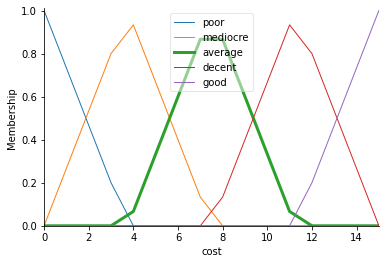

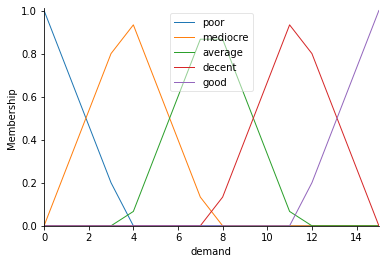

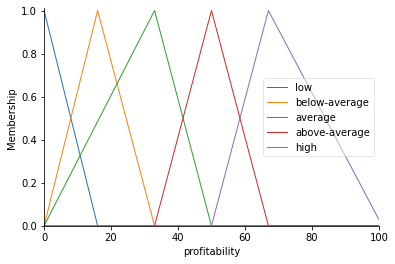

In [ ]:
cost['average'].view()
demand.view()
profitability.view()

Ahora graficamos todas las reglas para tener una mayor visualización del panorama


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbdf03730d0>)

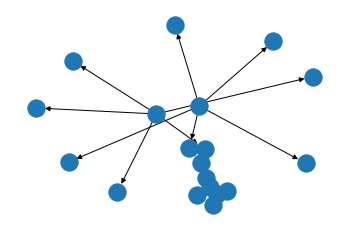

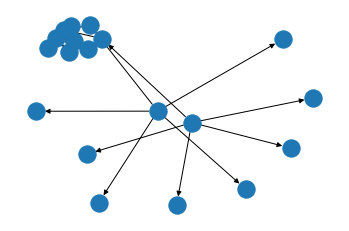

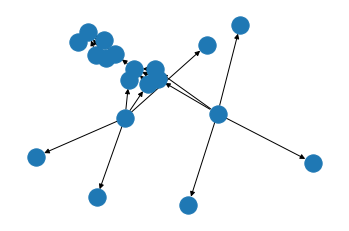

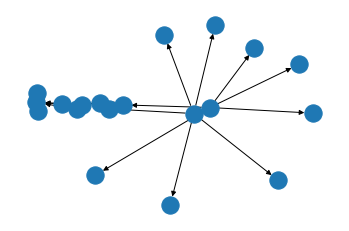

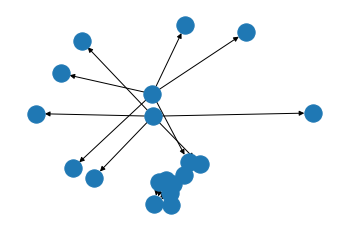

In [ ]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()

35.08128918579095


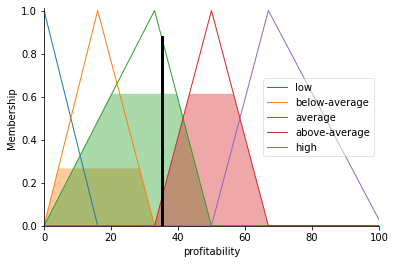

In [ ]:
print (profitability_sim.output['profitability'])
profitability.view(sim=profitability_sim)

Nuestro agente nos dice que el producto a comprar tiene una rentabilidad del 35.08%, en una escala del 0% al 100%